## Regression Pipeline - sklearn

#### Libraries

In [1]:
# Import modules we'll need for this notebook
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load Dataset - Not cleaned

In [2]:
# load the training dataset 
bike_data = pd.read_csv('../../DATA/daily-bike-share.csv')

# Add DAY column.
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day

# Numerical Features:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']

# Categorical Features:
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']

# Overall describe method:
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())

   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  day  
0           2  0.344167  0.363625  0.805833   0.160446      331    1  
1           2  0.363478  0.353739  0.696087   0.248539      131    2  
2           1  0.196364  0.189405  0.437273   0.248309      120    3  
3           1  0.200000  0.212122  0.590435   0.160296      108    4  
4           1  0.226957  0.229270  0.436957   0.186900       82    5  


### Prepare Training and Test datasets
* After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.

In [3]:
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


## Regression Pipeline
* Transformations:
- - Scale numerical values.
- - OneHot Encode categorical values.
* Regressor:
- - Gradient Boosting Regressor

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

#### 1. Find necessary transformations in the data

In [5]:
# Find numeric and categorical attribtues
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
rentals         int64
day             int64
dtype: object

In [6]:
# Select columns indexes
numeric_features = [6,7,8,9]
categorical_features = [0,1,2,3,4,5]

In [8]:
# Define preprocessing for numeric columns (scale them)
numeric_transformer = Pipeline(
                                steps=[
                                        ('scaler', StandardScaler()
                                    )
                                ]
)

# Define preprocessing for categorical features (encode them)
categorical_transformer = Pipeline(
                                    steps=[
                                            ('onehot', OneHotEncoder(handle_unknown='ignore')
                                        )
                                    ]
)

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


MSE: 105286.38204835508
RMSE: 324.4786311120581
R2: 0.7935926561510608


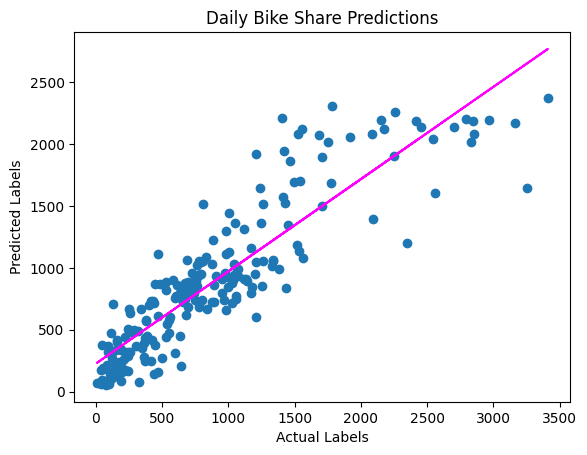

In [9]:
# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

r2_socre went slightly up.

## Use Pipeline with another regressor - Random Forest

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', RandomForestRegressor())])
MSE: 108875.21020818183
RMSE: 329.96243757158453
R2: 0.7865569837916486


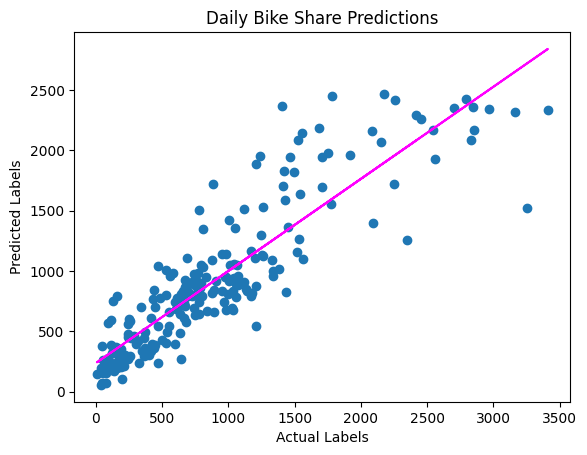

In [10]:
from sklearn.ensemble import RandomForestRegressor

new_pipeline = Pipeline(
    steps=[
            ('preprocessor', preprocessor),
            ('regressor', RandomForestRegressor())
    ]
)

new_model = new_pipeline.fit(X_train, (y_train))
print (new_model)

# Get predictions
predictions = new_model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Store and load the model to predict new Data

In [12]:
import joblib

# Save the model as a pickle file
filename = '../models/bike-share.pkl'
joblib.dump(model, filename)

['../models/bike-share.pkl']

In [13]:
# Load the model from the file
loaded_model = joblib.load(filename)

# An array of features based on five-day weather forecast
X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

# Use the model to predict rentals
results = loaded_model.predict(X_new)
print('5-day rental predictions:')
for prediction in results:
    print(np.round(prediction))

5-day rental predictions:
493.0
929.0
428.0
432.0
491.0
